# Section 2: Warm Up

## Step 1: Collect expert's data

In [1]:
%matplotlib inline
from run_expert import run_expert

In [2]:
run_expert('experts/Hopper-v1.pkl', 'Hopper-v1', num_rollouts=1, render=None)
run_expert('experts/Ant-v1.pkl', 'Ant-v1', num_rollouts=1, render=None)
run_expert('experts/HalfCheetah-v1.pkl', 'HalfCheetah-v1', num_rollouts=1, render=None)
run_expert('experts/Humanoid-v1.pkl', 'Humanoid-v1', num_rollouts=1, render=None)
run_expert('experts/Reacher-v1.pkl', 'Reacher-v1', num_rollouts=1, render=None)
run_expert('experts/Walker2d-v1.pkl', 'Walker2d-v1', num_rollouts=1, render=None)

---------------training Hopper-v1---------------
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
returns [3778.3574501753715]
mean return 3778.3574501753715
std of return 0.0
------------------------------



## Step 2: Run BC

In [2]:
from sec2_solution import run_bc
from run_expert import envs

for env in envs:
    run_bc(env, num_rollouts=3)

env=Walker2d-v1: 100%|██████████| 100/100 [03:39<00:00,  2.20s/it]


## Step 3: Plot

In [4]:
import matplotlib.pyplot as plt
import os
import numpy as np
from sec2_solution import get_bc_rewards

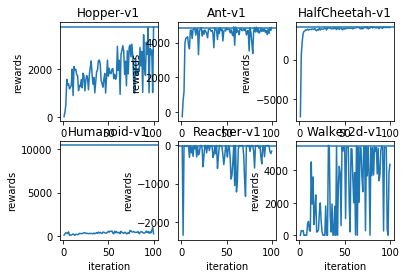

In [6]:
# plot rewards for behaviour learning
expert_rewards = []
for env in envs:
    expert_rewards.append(np.mean(np.load('data/{}_returns.npy'.format(env))))
data = [get_bc_rewards(e) for e in envs]

n_rows = 2
n_cols = 3

for i, e in enumerate(envs):
    plt.subplot(n_rows, n_cols, i+1)
    plt.axhline(y=expert_rewards[i])
    plt.plot(data[i]['x'], data[i]['y'])
    plt.xlabel('iteration')
    plt.ylabel('rewards')
    plt.title(e)